<h1>Database creation from the dataset</h1>

<h3>Import Libraries</h3>

In [2]:
import pandas as pd
import numpy as np

<h1>Dataset information:</h1>
About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://www.kaggle.com/datasets/gregorut/videogamesales

<h1>Load Dataset</h1>

In [337]:
data_raw = pd.read_csv("../vgsales.csv",index_col=False)
print(len(data_raw))
data_raw.head(10)

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 3FN and 4NF

This dataset had the 1st and 2st Normal Form. 
Below the dataset strutcure

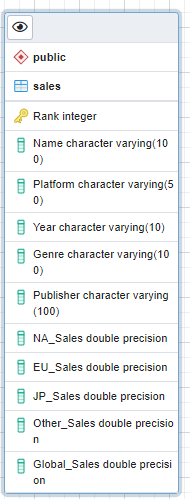

According to the data, it could be separerated in one table Game -- Related to Video game, and other table related to the Publisher of the game
<pre>
table_game:
id_game
name_game
genre_name
</pre>

<pre>
Table_publicher:
id_table
name_publisher
platform
</pre>

The realtion in this table will be one to many, One publisher can released multiple video games.One video game can only be released by one Publisher. 
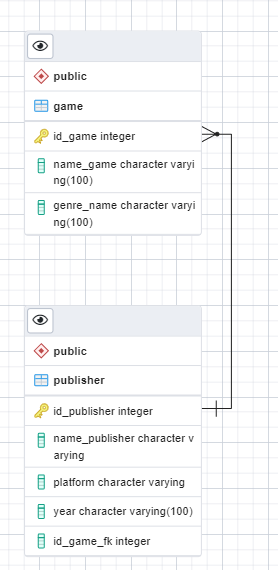

## Header of the dataset

In [338]:
header_table = data_raw.columns
header_table

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### Let's create game table

In [339]:
##Select columns of interest to this table
game_table = data_raw.loc[:,['Name','Genre']]

#Drop the duplicates
game_table.drop_duplicates(inplace=True)

#Create values Index
index_start=120
index_end = 120 + len(game_table)

#Create Index
game_table.loc[:,'id_game'] = np.arange(index_start,index_end)

#Save CSV
game_table.to_csv('Game',index=False)
print(len(game_table))
game_table

11497


,Name,Genre,id_game
0,Wii Sports,Sports,120
1,Super Mario Bros.,Platform,121
2,Mario Kart Wii,Racing,122
3,Wii Sports Resort,Sports,123
4,Pokemon Red/Pokemon Blue,Role-Playing,124
...,...,...,...
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,Action,11612
16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,Role-Playing,11613
16592,Plushees,Simulation,11614
16593,Woody Woodpecker in Crazy Castle 5,Platform,11615


In [341]:
table_merge_games = pd.merge(table_merge, game_table, on=['Name','Genre'], how='left')

#Save CSV
print(len(table_merge_games))
table_merge_games.head(7)

16598


,Publisher,Platform,Year,Rank,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id_game
0,Nintendo,Wii,2006.0,1,Wii Sports,Sports,41.49,29.02,3.77,8.46,82.74,120
1,Nintendo,Wii,2006.0,8,Wii Play,Misc,14.03,9.20,2.93,2.85,29.02,127
2,Nintendo,Wii,2006.0,101,The Legend of Zelda: Twilight Princess,Action,3.83,2.19,0.60,0.70,7.31,211
3,Nintendo,Wii,2006.0,491,WarioWare: Smooth Moves,Puzzle,0.87,1.06,0.73,0.26,2.92,544
4,Nintendo,Wii,2006.0,1141,Pokemon Battle Revolution,Role-Playing,0.80,0.38,0.30,0.13,1.61,1053
5,Nintendo,Wii,2006.0,3698,Excite Truck,Racing,0.40,0.03,0.08,0.04,0.54,2822
6,Nintendo,Wii,2006.0,5268,Trauma Center: Second Opinion,Simulation,0.28,0.02,0.03,0.03,0.35,3828


In [347]:
#Add column to publisher
publisher_table = table_merge_games.loc[:,['Rank','Publisher','Platform','Year','id_game']]

#Create values Index
index_start=300
index_end = 300 + len(publisher_table)

#Create Index
publisher_table.loc[:,'id_publisher'] = np.arange(index_start,index_end)

# #Save CSV
publisher_table.to_csv('Publisher',index=False)

publisher_table

,Rank,Publisher,Platform,Year,id_game,id_publisher
0,1,Nintendo,Wii,2006.0,120,300
1,8,Nintendo,Wii,2006.0,127,301
2,101,Nintendo,Wii,2006.0,211,302
3,491,Nintendo,Wii,2006.0,544,303
4,1141,Nintendo,Wii,2006.0,1053,304
...,...,...,...,...,...,...
16593,16579,Alternative Software,XOne,2016.0,9323,16893
16594,16588,Destineer,PC,2011.0,11609,16894
16595,16596,Kemco,GBA,2002.0,11615,16895
16596,16599,7G//AMES,DS,2010.0,11616,16896


Let's create the table Sales<p>
The ERD Diagram looks like 
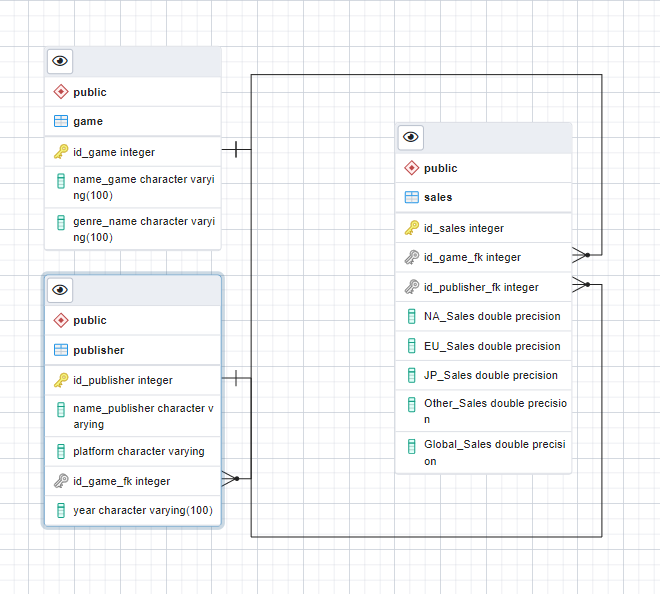


In [359]:
new_merge_to_sales = pd.merge(publisher_table.loc[:,['Rank','id_publisher']],table_merge_games, on=['Rank'], how='left')

In [360]:
sales_table = new_merge_to_sales.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','id_publisher','id_game']]
#Create values Index
index_start=600
index_end = 600 + len(sales_table)

#Create Index
sales_table.loc[:,'id_sales'] = np.arange(index_start,index_end)

# #Save CSV
sales_table.to_csv('sales',index=False)

print(len(sales_table))
sales_table.head(7)

16598


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id_publisher,id_game,id_sales
0,41.49,29.02,3.77,8.46,82.74,300,120,600
1,14.03,9.20,2.93,2.85,29.02,301,127,601
2,3.83,2.19,0.60,0.70,7.31,302,211,602
3,0.87,1.06,0.73,0.26,2.92,303,544,603
4,0.80,0.38,0.30,0.13,1.61,304,1053,604
5,0.40,0.03,0.08,0.04,0.54,305,2822,605
6,0.28,0.02,0.03,0.03,0.35,306,3828,606


In [361]:
game_table

,Name,Genre,id_game
0,Wii Sports,Sports,120
1,Super Mario Bros.,Platform,121
2,Mario Kart Wii,Racing,122
3,Wii Sports Resort,Sports,123
4,Pokemon Red/Pokemon Blue,Role-Playing,124
...,...,...,...
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,Action,11612
16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,Role-Playing,11613
16592,Plushees,Simulation,11614
16593,Woody Woodpecker in Crazy Castle 5,Platform,11615


In [362]:
publisher_table.

,Rank,Publisher,Platform,Year,id_game,id_publisher
0,1,Nintendo,Wii,2006.0,120,300
1,8,Nintendo,Wii,2006.0,127,301
2,101,Nintendo,Wii,2006.0,211,302
3,491,Nintendo,Wii,2006.0,544,303
4,1141,Nintendo,Wii,2006.0,1053,304
...,...,...,...,...,...,...
16593,16579,Alternative Software,XOne,2016.0,9323,16893
16594,16588,Destineer,PC,2011.0,11609,16894
16595,16596,Kemco,GBA,2002.0,11615,16895
16596,16599,7G//AMES,DS,2010.0,11616,16896


In [363]:
sales_table

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id_publisher,id_game,id_sales
0,41.49,29.02,3.77,8.46,82.74,300,120,600
1,14.03,9.20,2.93,2.85,29.02,301,127,601
2,3.83,2.19,0.60,0.70,7.31,302,211,602
3,0.87,1.06,0.73,0.26,2.92,303,544,603
4,0.80,0.38,0.30,0.13,1.61,304,1053,604
...,...,...,...,...,...,...,...,...
16593,0.00,0.01,0.00,0.00,0.01,16893,9323,17193
16594,0.01,0.00,0.00,0.00,0.01,16894,11609,17194
16595,0.01,0.00,0.00,0.00,0.01,16895,11615,17195
16596,0.00,0.01,0.00,0.00,0.01,16896,11616,17196


The table Publisher were found other relation, the table could be split in one table that had platform and publisher and make the relation Many-to-Many with the reamining columns of publisher table

In [367]:
publisher_table.sort_values(by='Year')

,Rank,Publisher,Platform,Year,id_game,id_publisher
1999,545,Atari,2600,1980.0,591,2299
6667,5368,Activision,2600,1980.0,3895,6967
2001,6898,Atari,2600,1980.0,4935,2301
2000,1971,Atari,2600,1980.0,1663,2300
6664,1768,Activision,2600,1980.0,1513,6964
...,...,...,...,...,...,...
16407,16060,Oxygen Interactive,PSP,NaN,4898,16707
16408,16061,Black Bean Games,PC,NaN,5282,16708
16461,16194,NaN,PC,NaN,11328,16761
16483,16249,Idea Factory,PS3,NaN,11366,16783


-------------------------------------------------------------------------------------------------------

<h1>Database creation from the dataset</h1>

<h3>Import Libraries</h3>

In [369]:
import pandas as pd
import numpy as np

<h1>Dataset information:</h1>
About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://www.kaggle.com/datasets/gregorut/videogamesales

<h1>Load Dataset</h1>

In [370]:
data_raw = pd.read_csv("../vgsales.csv",index_col=False)
print(len(data_raw))
data_raw.head(10)

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 3FN and 4NF

This dataset had the 1st and 2st Normal Form. 
Below the dataset strutcure

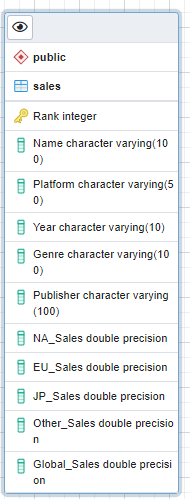

According to the data, it could be separerated in one table Game -- Related to Video game, and other table related to the Publisher of the game
<pre>
table_game:
id_game
name_game
genre_name
id_publisher_fk
id_sales_fk
</pre>

<pre>
Table_publisher:
id_publisher
name_publisher
platform
year
</pre>

The realtion in this table will be one to many, One publisher can released multiple video games.One video game can only be released by one Publisher. 
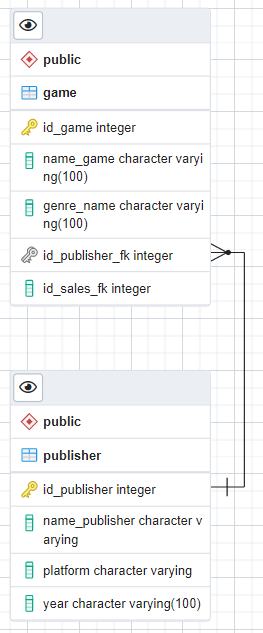

## Header of the dataset

In [371]:
header_table = data_raw.columns
header_table

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### Let's create publihser table

In [373]:
##Select columns of interest to this table
publisher_table = data_raw.loc[:,['Publisher','Platform','Year']]

#Drop the duplicates
publisher_table.drop_duplicates(inplace=True)

#Create values Index
index_start=120
index_end = 120 + len(publisher_table)

#Create Index
publisher_table.loc[:,'id_´publisher'] = np.arange(index_start,index_end)

#Save CSV
publisher_table.to_csv('publisher',index=False)
print(len(publisher_table))
publisher_table

5068


,Publisher,Platform,Year,id_´publisher
0,Nintendo,Wii,2006.0,120
1,Nintendo,NES,1985.0,121
2,Nintendo,Wii,2008.0,122
3,Nintendo,Wii,2009.0,123
4,Nintendo,GB,1996.0,124
...,...,...,...,...
16576,Alternative Software,XOne,2016.0,5183
16585,Destineer,PC,2011.0,5184
16593,Kemco,GBA,2002.0,5185
16596,7G//AMES,DS,2010.0,5186


In [374]:

pd.merge(data_raw, publisher_table, on=['Publisher','Platform','Year'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,id_´publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,120
1,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,120
2,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,120
3,491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92,120
4,1141,Pokemon Battle Revolution,Wii,2006.0,Role-Playing,Nintendo,0.80,0.38,0.30,0.13,1.61,120
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,5183
16594,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,5184
16595,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,5185
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,5186


create table to relate game_tables and Publisher_tables